Importing required libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plotly.offline import iplot
from sklearn import linear_model

Loading the dataset

In [11]:
#Load the data
data = pd.read_csv("Company_data.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


EDA

In [ ]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
data.shape

(200, 4)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [38]:
#Create features and taget arrays from given data
X = data.drop('Sales',axis=1).values
y = data['Sales'].values


In [32]:
X_tv= X[:,0]

In [33]:
type(X_tv),type(y)

(numpy.ndarray, numpy.ndarray)

In [34]:
X_tv.shape,y.shape

((200,), (200,))

In [35]:
X_tv = X_tv.reshape(-1,1)
y = y.reshape(-1,1)

In [36]:
X_tv.shape,y.shape

((200, 1), (200, 1))

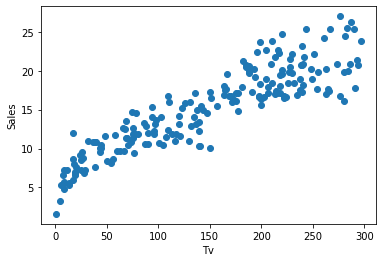

In [43]:
plt.scatter(X_tv,y)
plt.xlabel('Tv')
plt.ylabel('Sales')
plt.show()

In [44]:
reg = linear_model.LinearRegression()
reg.fit(X_tv,y)

LinearRegression()

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_tv,y,test_size=0.30,train_size=0.70)

Training the model

In [51]:
#evaluating the model on training
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_train_pred = reg.predict(X_train)

print(f'MAE = {mean_absolute_error(y_train, y_train_pred)}')
print(f'MSE = {mean_squared_error(y_train, y_train_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_train_pred))}')
print(f'R_2 = {r2_score(y_train, y_train_pred)}')

MAE = 1.7553617862596538
MSE = 4.849810185680378
RMSE = 2.202228459011548
R_2 = 0.8266802492493628


Testing the model

In [52]:
#evaluating the data on testing
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_test_pred = reg.predict(X_test)

print(f'MAE = {mean_absolute_error(y_test, y_test_pred)}')
print(f'MSE = {mean_squared_error(y_test, y_test_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_test_pred))}')
print(f'R_2 = {r2_score(y_test, y_test_pred)}')

MAE = 2.0061133793716133
MSE = 6.076255892729545
RMSE = 2.465006266265777
R_2 = 0.7771626018827105


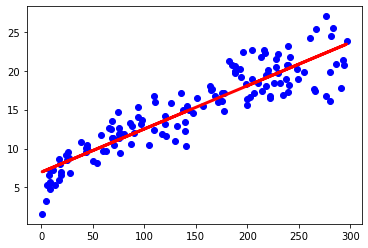

In [55]:
plt.scatter(X_train, y_train,color='blue')
plt.plot(X_train, reg.predict(X_train), color='red', linewidth=3)
plt.show()

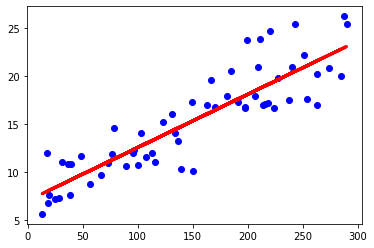

In [56]:
plt.scatter(X_test, y_test,color='blue')
plt.plot(X_test, reg.predict(X_test), color='red', linewidth=3)
plt.show()

In [59]:
prediction_space = np.linspace(min(X_train), max(X_train)).reshape(-1,1)

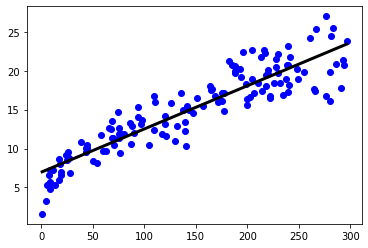

In [61]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

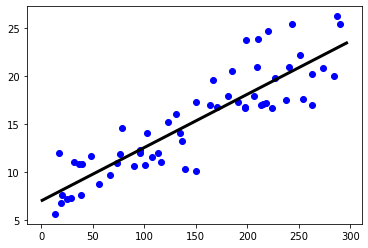

In [62]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()